In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('display.max_columns',None)

In [2]:
import gzip
import copy

In [5]:
acc = pd.read_csv("acc_vred.csv.gz",
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')

target_2_train = pd.read_csv("target_2_train_feateng_dwnsmpl.csv.gz",
                                         compression='gzip',
                                         header=0,
                                         sep=',',
                                         quotechar='"')

In [6]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269360 entries, 0 to 269359
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   annual_inc      269360 non-null  float64
 1   fico_score      269360 non-null  float64
 2   term            269360 non-null  int64  
 3   loan_amnt       269360 non-null  float64
 4   home_ownership  269360 non-null  int64  
 5   int_rate        269360 non-null  float64
 6   all_util        269360 non-null  float64
 7   dti             269360 non-null  float64
 8   pnl             269360 non-null  float64
 9   roi             269360 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 20.6 MB


In [7]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.set_params(random_state=108)

RandomForestClassifier(random_state=108)

In [6]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 108,
 'verbose': 0,
 'warm_start': False}

In [8]:
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(acc,target_2_train,test_size=0.2)

In [9]:
rf.fit(X_train, y_train)

/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(random_state=108)

In [69]:
n_folds = ms.KFold(n_splits=5, random_state=108, shuffle=True)

In [74]:
from sklearn.model_selection import GridSearchCV
grid_para_rf = [{
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": [2,5],
    "min_samples_split": [2,3],
    "n_estimators":[100,200,500],
#    "random_state":108
}]

In [71]:
# train_scores = []
# test_scores = []
# train_rmse = []
# test_rmse = []
# best_par_list = []

# nestimators = [100]
# minchildweight = [1, 5]
# maxdepth = [1, 3]
# learningrate = [0.1, 1]
# gamma_ = [0.5, 2]
# subsample_ = [0.8, 1]
# colsamplebytree = [0.8, 1]


# gparam_xgb_rf = {'objective': objective_,
#                  'eval_metric': evalmetric,
#                  'use_label_encoder': uselabelencoder,
#                  'tree_method': treemethod,
#                  'predictor': predictor_,
#                  'n_jobs': -1,
#                  'booster': booster_,
# #               'n_estimators': nestimators,
# #               'min_child_weight': minchildweight,
# #               'max_depth': maxdepth,
# #               'learning_rate': learningrate,
# #               'gamma': gamma_,
# #               'subsample': subsample_,
# #               'colsample_bytree': colsamplebytree,
#                  'random_state': randomstate}


gs_rf = ms.GridSearchCV(rf, grid_para_rf, cv=n_folds, refit=True, n_jobs=-1,
                          scoring='roc_auc', return_train_score=True)

%time gs_rf.fit(X_train, y_train)

# # setting up dataframe for results
# train_scores.append(gs_rf.best_params_.score(X_train, y_train))
# test_scores.append(gs_rf.best_params_.score(X_test, y_test))
# train_scores.append(gs_rf.best_score(X_train, y_train))
# test_scores.append(gs_rf.best_score(X_test, y_test))

# # use rmse function from Self_Written_Functions_Sheet_Recover
# train_rmse.append(rmse(gs_rf, X_train, y_train))
# test_rmse.append(rmse(gs_rf, X_test, y_test))

# # add the best parameters to the df
# best_par_list.append(gs_rf.best_params_)

# # find the difference btwn the rmses
# diff_rmse = np.subtract(train_rmse, test_rmse)

# # create dataframe
# list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
# res_df = pd.DataFrame(list_results).T
# res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
# best_par_df = pd.DataFrame(best_par_list)
# res_df = pd.concat([res_df, best_par_df], axis=1, sort=False)

# # confusion matrix for train set
# print('\n')
# print('confusion matrix for train set')
# print(confusion_matrix(ytrain_rf, gs_rf.predict(X_train)))

# # confusion matrix for test set
# print('\n')
# print('confusion matrix for test set')
# print(confusion_matrix(ytest_rf, gs_rf.predict(X_test)))

# res_df

ValueError: Parameter grid for parameter (random_state) needs to be a list or numpy array, but got (<class 'int'>). Single values need to be wrapped in a list with one element.

In [76]:
gs_rf = GridSearchCV(rf, grid_para_rf, cv=5, scoring='roc_auc', n_jobs=-1, verbose = 2)
%time gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


CPU times: user 2min 16s, sys: 1.82 s, total: 2min 17s
Wall time: 53min 40s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=108),
             n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [2, 5],
                          'min_samples_split': [2, 3],
                          'n_estimators': [100, 200, 500]}],
             scoring='roc_auc', verbose=2)

In [78]:
gs_rf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 500}

In [80]:
gs_rf.best_score_

0.7073043380061833

In [82]:
print("The training error is: %.5f" % (1 - gs_rf.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - gs_rf.score(X_test, y_test)))

The training error is: 0.06407
The test     error is: 0.29580


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, gs_rf.predict(X_train))

array([[91434, 16353],
       [15465, 92236]])

In [84]:
confusion_matrix(y_test, gs_rf.predict(X_test))

array([[17021,  9872],
       [ 9096, 17883]])

In [85]:
from sklearn.metrics import roc_auc_score
print ("Random forest ROC-AUC score")
print ('-'*70)
roc_auc_score(y_test, gs_rf.predict(X_test))

Random forest ROC-AUC score
----------------------------------------------------------------------


0.6478822555331887

In [88]:
gs_rf.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 108,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(random_state=108),
 'n_jobs': -1,
 'param_grid': [{'criterion': ['gini', 'entropy'],
   'min_samples_leaf': [2, 5],
   'min_samples_split': [2, 3],
   'n_estimators': [100, 200, 500]}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'roc_auc',
 

In [91]:
grid_para_rf1 = [{
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": [5],
    "min_samples_split": [2,3],
    "n_estimators":[500],
    "random_state":[108],
    "warm_start":[True, False],
    "max_depth":[50,100]
}]

gs_rf1 = GridSearchCV(rf, grid_para_rf1, cv=5, scoring='roc_auc', n_jobs=-1, verbose = 2)
%time gs_rf1.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


CPU times: user 2min 14s, sys: 1.77 s, total: 2min 16s
Wall time: 1h 47s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=108),
             n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [50, 100], 'min_samples_leaf': [5],
                          'min_samples_split': [2, 3], 'n_estimators': [500],
                          'random_state': [108], 'warm_start': [True, False]}],
             scoring='roc_auc', verbose=2)

In [92]:
gs_rf1.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 108,
 'warm_start': True}

In [93]:
gs_rf1.best_score_

0.7073043380061833

In [94]:
confusion_matrix(y_train, gs_rf1.predict(X_train))

array([[91434, 16353],
       [15465, 92236]])

In [95]:
confusion_matrix(y_test, gs_rf1.predict(X_test))

array([[17021,  9872],
       [ 9096, 17883]])

In [10]:
rf.set_params(criterion = 'entropy',
              max_depth = 50,
             min_samples_leaf = 5,
             min_samples_split = 2,
             n_estimators = 500)

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=5,
                       n_estimators=500, random_state=108)

In [11]:
rf.fit(X_train, y_train)

/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=5,
                       n_estimators=500, random_state=108)

In [12]:
from sklearn.metrics import roc_auc_score
print ("Random forest ROC-AUC score")
print ('-'*70)
roc_auc_score(y_test, rf.predict(X_test))

Random forest ROC-AUC score
----------------------------------------------------------------------


0.9664005616554069

In [13]:
ypred = rf.predict(X_test)
ypred = ypred.reshape(53872, 1)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rf.predict(X_test))

array([[26802,   172],
       [ 1636, 25262]])

In [15]:
# predicted as default and actually default
true_pos = np.logical_and(y_test == ypred, ypred == 1)

# predicted as default, but fully paid
false_pos = np.logical_and(y_test != ypred, ypred == 1)

# predicted as paid off and actually paid off
true_neg = np.logical_and(y_test == ypred, ypred == 0)

# predicted as paid off, but default
false_neg = np.logical_and(y_test != ypred, ypred == 0)

# getting indices of the above
true_pos_index = list(true_pos[true_pos['loan_status_binary']==True].index)

false_pos_index = list(false_pos[false_pos['loan_status_binary']==True].index)

true_neg_index = list(true_neg[true_neg['loan_status_binary']==True].index)

false_neg_index = list(false_neg[false_neg['loan_status_binary']==True].index)

In [16]:
sum_false_neg = np.sum(acc.iloc[false_neg_index][['pnl']]).astype(int)[0]
sum_false_neg

3595255

In [17]:
sum_false_pos = np.sum(acc.iloc[false_pos_index][['pnl']]).astype(int)[0]
sum_false_pos

190882

In [18]:
sum_true_pos = np.sum(acc.iloc[true_pos_index][['pnl']]).astype(int)[0]
sum_true_pos

-198377178

In [19]:
sum_true_neg = np.sum(acc.iloc[true_neg_index][['pnl']]).astype(int)[0]
sum_true_neg

63012368

In [20]:
# test set also has artifical proportions between default and fully paid

# roi can be weighted by loan amount

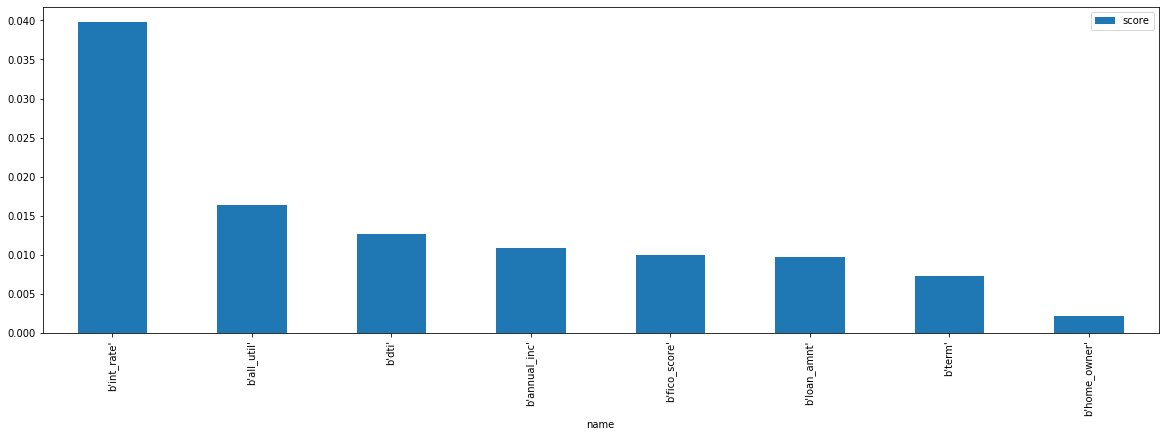

In [21]:
feature_importance = list(zip(X_train.columns[:-2], rf.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score',figsize=(20,6))